In [11]:
%matplotlib inline
from __future__ import division
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
sys.path.append("/Users/kris/Desktop/ijcai2k18/code/")
np.random.seed(1337)

### These Experiments indicate only minibatch diversification for a single minibatch.
### This   is the following aglorithm for our method.

Repeat for each minibatch creation.
1. sampled=[] **Set of points sampled for minibatch i**
2. model.fit(x,y) **Fit model on the full dataset**
3. for i in x:
4.   if i not in sampled: **Sampled without replacement. We have to sample without replacement in this case**
5.      score = compute score(i)
6.      max_score = max(max_score, score)**Find if i is the maximum score store it in max_idx**
7.  sampled.append(max_idx)**add max_idx to the list of sampled**

Score functions uses the uncertainity using the logistic regression.
It uses the distance measure on the original data points values.

In [2]:
dataset = datasets.MNIST('../data', train=True, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

In [11]:


def train(epoch):
    for e in range(epoch):
        data, target = data.to(device), target.to(device)
        idx = compute_score(data, target)
        data_sub_sampled=data[idx]
        optimizer.zero_grad()
        output, feat = model(data_sub_sampled)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if 

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, args.epochs + 1):
    train(epoch)
    test()

IndentationError: expected an indented block (<ipython-input-11-f5b8dfbfe476>, line 43)

In [5]:
org_x = np.random.uniform(0, 2, 4000)
org_y = np.random.uniform(0, 2, 4000)
data = list(zip(org_x,org_y))

In [44]:
# Creating a Subsampled Version of dataet
a, b = list(zip(*data))
p = [ abs(a[i]-b[i])**2.5 for i in range(0, len(a))]
p = p / np.sum(p)
idx = np.random.choice(np.arange(0, len(a)), 1200, replace=False, p=p)
toy_dataset = np.array(data)
a, b = list(zip(*toy_dataset[idx]))
obs_dataset = list(zip(a, b))
a=np.array(a)
b=np.array(b)

In [45]:
# Random Sampling
sampled_rnd = []
size=200
sampled_rnd.extend(np.random.choice(np.arange(0, len(a)), size, replace=True))
# Computing Number of times items sampled
df_rnd = np.zeros(([len(np.unique(sampled_rnd)), 2]))
df_rnd[:, 0], df_rnd[:,1]=np.unique(sampled_rnd, return_counts=True)
df_rnd = df_rnd.astype(np.int32)

In [29]:
# Dpp Sampling
from sklearn.metrics.pairwise import euclidean_distances, rbf_kernel
similarity_matrix = rbf_kernel(obs_dataset, gamma=0.05)
eig_val, eig_vec = np.linalg.eig(similarity_matrix)
L =similarity_matrix
D, V = decompose_kernel(L)
sampled_dpp = []
size=200
y = k_sample(size, D, V)
y = y.astype("int")
sampled_dpp.append(y)
# Computing Number of times items sampled
df_dpp = np.zeros(([len(np.unique(sampled_dpp)), 2]))
df_dpp[:, 0], df_dpp[:,1]=np.unique(sampled_dpp, return_counts=True)
df_dpp = df_dpp.astype(np.int32)

In [47]:
# Our Method
data=np.array(obs_dataset)
label=np.zeros(data.shape[0])
for k,v in enumerate(data):
    if v[1]>=1:
        label[k]=1
sampled_sgd = []
size=200
sampled_sgd.extend(ssgd(logistic, data, label, size))
df_sgd = np.zeros(([len(np.unique(sampled_sgd)), 2]))
df_sgd[:, 0], df_sgd[:,1]=np.unique(sampled_sgd, return_counts=True)
df_sgd = df_sgd.astype(np.int32)

(1200, 2)


In [48]:
#Krause Method
data=np.array(obs_dataset)
label=np.zeros(data.shape[0])
for k,v in enumerate(data):
    if v[1]>=1:
        label[k]=1
sampled_flid = []
size=200
sampled_flid.extend(flid(logistic, data, label, size))
df_flid = np.zeros(([len(np.unique(sampled_flid)), 2]))
df_flid[:, 0], df_flid[:,1]=np.unique(sampled_flid, return_counts=True)
df_flid = df_flid.astype(np.int32)

(1200, 2)


Text(0.5,1,'Krause Method')

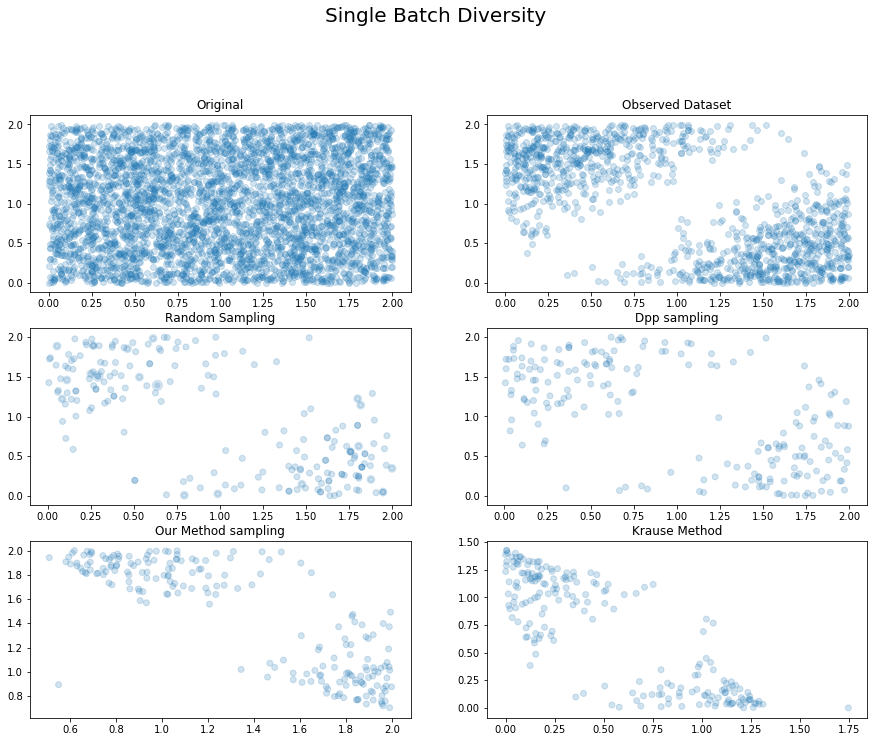

In [57]:
f = plt.figure(figsize=(15,15))
f.suptitle("Single Batch Diversity", fontsize=20)
ax0=f.add_subplot(421)
ax0.set_title("Original")
ax0.scatter(org_x, org_y, alpha=0.2)
ax = f.add_subplot(422)
ax.scatter(a, b, alpha=0.2)
ax.set_title('Observed Dataset')
ax1 = f.add_subplot(423)
ax1.scatter(a[sampled_rnd], b[sampled_rnd], alpha=0.2, linewidths=df_rnd[:, 1]**1.5)
ax1.set_title('Random Sampling')
ax2 = f.add_subplot(424)
ax2.scatter(a[sampled_dpp], b[sampled_dpp], alpha=0.2, linewidths=df_dpp[:, 1]**2)
ax2.set_title('Dpp sampling')
ax4 = f.add_subplot(425)
ax4.scatter(a[sampled_sgd], b[sampled_sgd], alpha=0.2, linewidths=df_sgd[:, 1])
ax4.set_title('Our Method sampling')
ax5 = f.add_subplot(426)
ax5.scatter(a[sampled_flid], b[sampled_flid], alpha=0.2, linewidths=df_flid[:, 1])
ax5.set_title('Krause Method')

In [4]:
def create_imbalanced(**kwargs):
    """
    The function creates a imbalenced samples.
    This is done using sampling given from class lables 
    in a ratio given.
    :param
    kwargs: (class_label, sampling_ratio)
    """
    
    data = list(zip(np.arange(0, len(dataset.train_labels)), dataset.train_labels))
    data = np.array(data)
    data_points=[]
    data_labels=[]
    for key, value in kwargs.items():
        key=float(key)
        value=float(value)
        candidates = data[data[:, 1]==key][:,0]
        data_points.extend(np.random.choice(candidates, size=int(len(candidates)*value)))
        data_labels.extend([key]*int(len(candidates)*value))
    return list(zip(data_points, data_labels))

In [8]:
kw={'0': '0.01', '1':'0.01', '2':'0.01', '3':'0.01', '4':'0.01', '5':'0.01', '6':'0.01', '7':'0.01', '8':'0.5', '9':'0.01'}
data = create_imbalanced(**kw)
data=np.array(data)
x_train=dataset.train_data[data[:, 0]]
x_label= data[:, 1]
idx = data[:, 0].astype("int")
label = data[:, 1].astype("int")
x_train_dim_red = np.load("./mnist_tsne_vis.npy")

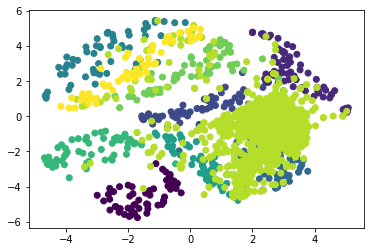

In [9]:
plt.scatter(x_train_dim_red[idx, 0], x_train_dim_red[idx, 1], c=label)

In [17]:
device=0
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        feat_x = F.relu(self.fc1(x))
        x = feat_x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1), feat_x


model = Net().to(device)

optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)


#Sampler
def compute_score(model, data, target):
    sampled=[]
    idx=[]
    output, feat = model(data)
    loss = F.nll_loss(output, target)
    weight = 0
    prob = torch.nn.Softmax(loss)
    if len(sampled)==0:
        sampled.extend(np.argmax(prob))
        idx.extend(np.argmax(prob))
    else:
        for i in range(0, batch_size):
            dist = torch.mm(feat, feat[sampled].T) # Using co-sine distance
            min_dist = torch.min(dist, dim=0)
            mean_dist = torch.mean(dist, dim=0)
            score = min_dist + mean_dist + prob
            weight = score
            sampled.extend(np.argmax(weight))
            idx.extend(np.argmax(weight))
    return idx


for num in compute_score(model, data, target):
    print(num)

RuntimeError: Error attempting to use dtype torch.float32 with layout torch.strided and device type CUDA.  Torch not compiled with CUDA enabled.
